In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter


In [2]:
wikiart_dataset = '/Users/ketianaosias/Desktop/Projects/WikiArt'

In [3]:
style_folders = [f for f in os.listdir(wikiart_dataset) if os.path.isdir(os.path.join(wikiart_dataset, f))]
print(f"Number of styles found: {len(style_folders)}")

Number of styles found: 27


In [4]:
style_counts = {}
for style in style_folders:
    style_path = os.path.join(wikiart_dataset, style)
    images = [f for f in os.listdir(style_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    style_counts[style] = len(images)
    print(f"{style}: {len(images)} images")


Early_Renaissance: 1391 images
Analytical_Cubism: 110 images
Mannerism_Late_Renaissance: 1279 images
Expressionism: 6736 images
Contemporary_Realism: 481 images
Fauvism: 934 images
Northern_Renaissance: 2552 images
Rococo: 2089 images
Ukiyo_e: 1167 images
Pop_Art: 1483 images
High_Renaissance: 1343 images
Minimalism: 1337 images
Art_Nouveau_Modern: 4334 images
Action_painting: 98 images
Color_Field_Painting: 1615 images
Symbolism: 4528 images
Realism: 10733 images
Romanticism: 7019 images
Cubism: 2235 images
Impressionism: 13060 images
New_Realism: 314 images
Baroque: 4240 images
Post_Impressionism: 6450 images
Abstract_Expressionism: 2782 images
Pointillism: 513 images
Synthetic_Cubism: 216 images
Naive_Art_Primitivism: 2405 images


In [5]:
print(f"\nTotal images: {sum(style_counts.values())}")


Total images: 81444


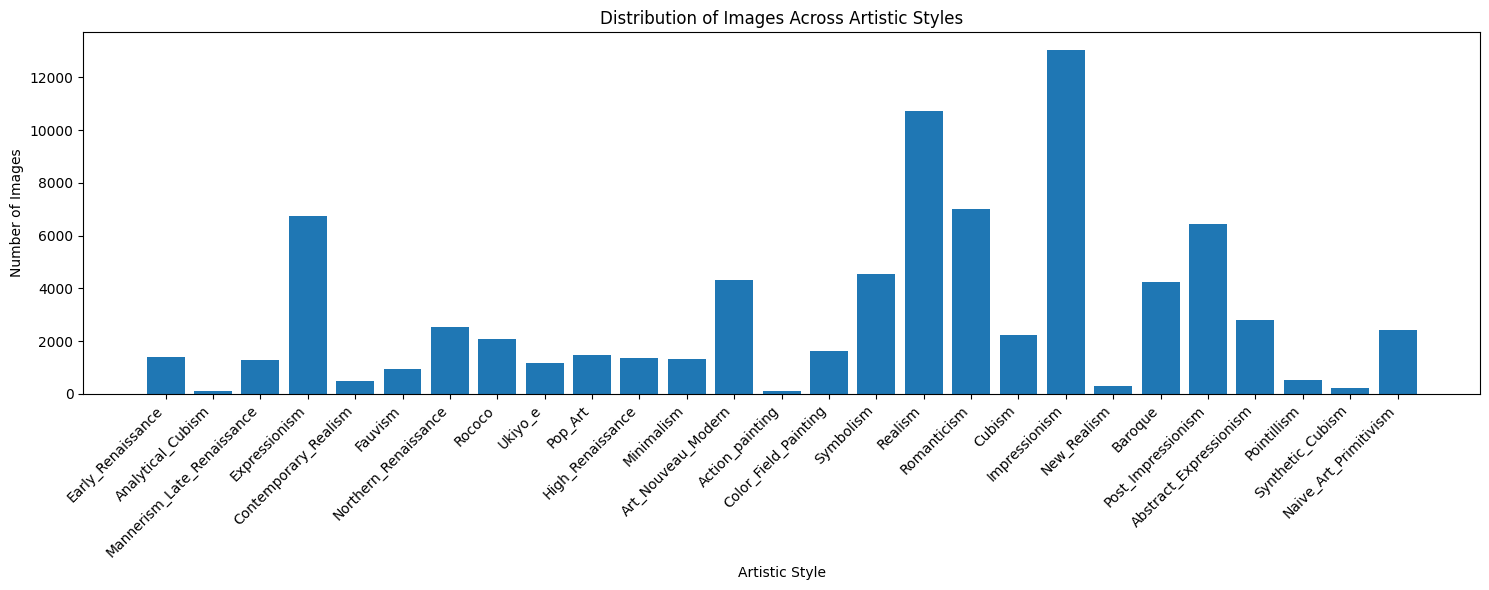

In [7]:
plt.figure(figsize=(15, 6))
styles = list(style_counts.keys())
counts = list(style_counts.values())

plt.bar(styles, counts)
plt.xlabel('Artistic Style')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Artistic Styles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
print(f"\nClass Balance Statistics:")
print(f"Mean images per style: {np.mean(counts):.2f}")
print(f"Median images per style: {np.median(counts):.2f}")
print(f"Min images in a style: {np.min(counts)} ({styles[np.argmin(counts)]})")
print(f"Max images in a style: {np.max(counts)} ({styles[np.argmax(counts)]})")


Class Balance Statistics:
Mean images per style: 3016.44
Median images per style: 1615.00
Min images in a style: 98 (Action_painting)
Max images in a style: 13060 (Impressionism)


In [10]:
print("\nChecking for corrupted files...")
corrupted_files = []

for style in style_folders:
    style_path = os.path.join(wikiart_dataset, style)
    image_files = [f for f in os.listdir(style_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_file in image_files:
        img_path = os.path.join(style_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Verify it's a valid image
            img.close()
        except Exception as e:
            corrupted_files.append(img_path)
            print(f"Corrupted: {img_path}")

print(f"\nTotal corrupted files found: {len(corrupted_files)}")



Checking for corrupted files...

Total corrupted files found: 0


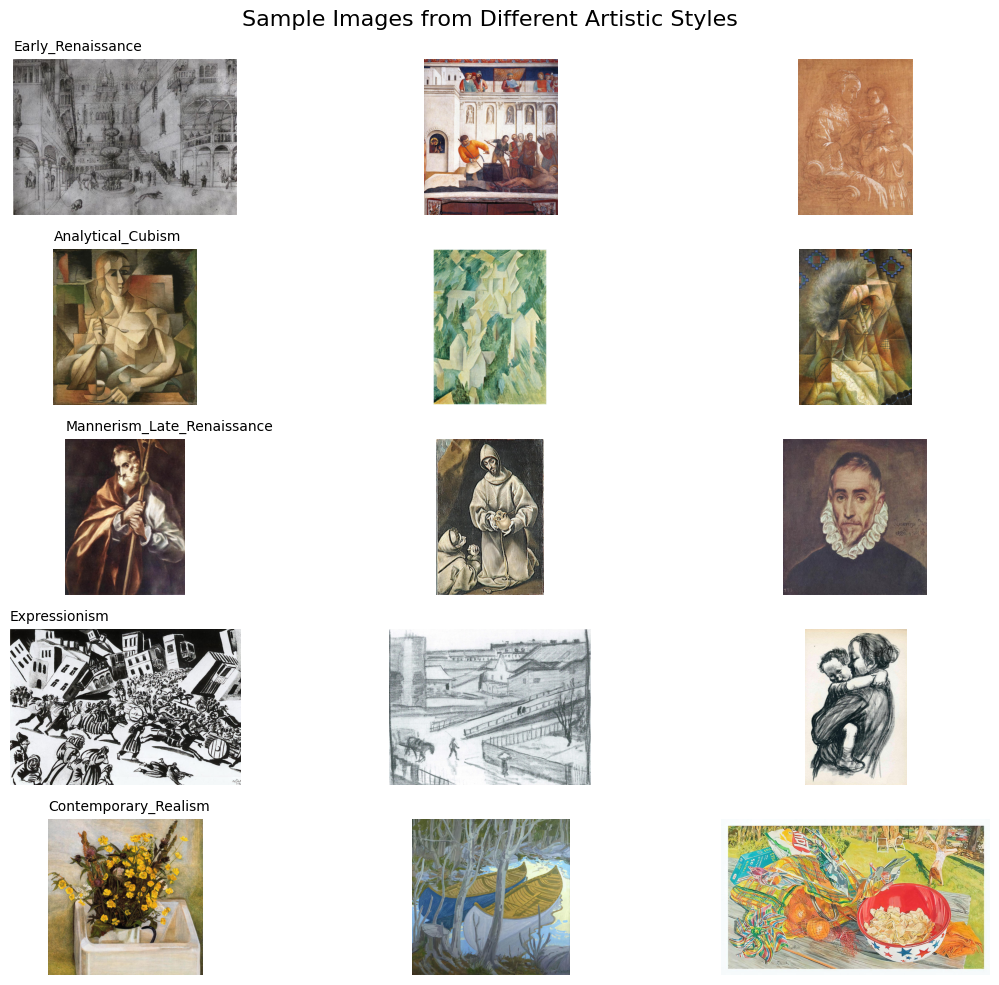

In [13]:
num_styles_to_show = 5  # Show samples from 5 styles
num_samples_per_style = 3  # Show 3 images per style

fig, axes = plt.subplots(num_styles_to_show, num_samples_per_style, figsize=(12, 10))
fig.suptitle('Sample Images from Different Artistic Styles', fontsize=16)

for i, style in enumerate(style_folders[:num_styles_to_show]):
    style_path = os.path.join(wikiart_dataset, style)
    image_files = [f for f in os.listdir(style_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    samples = np.random.choice(image_files, min(num_samples_per_style, len(image_files)), replace=False)

    for j, img_file in enumerate(samples):
        img_path = os.path.join(style_path, img_file)
        try:
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(f"{style}", fontsize=10, loc='left')
        except:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


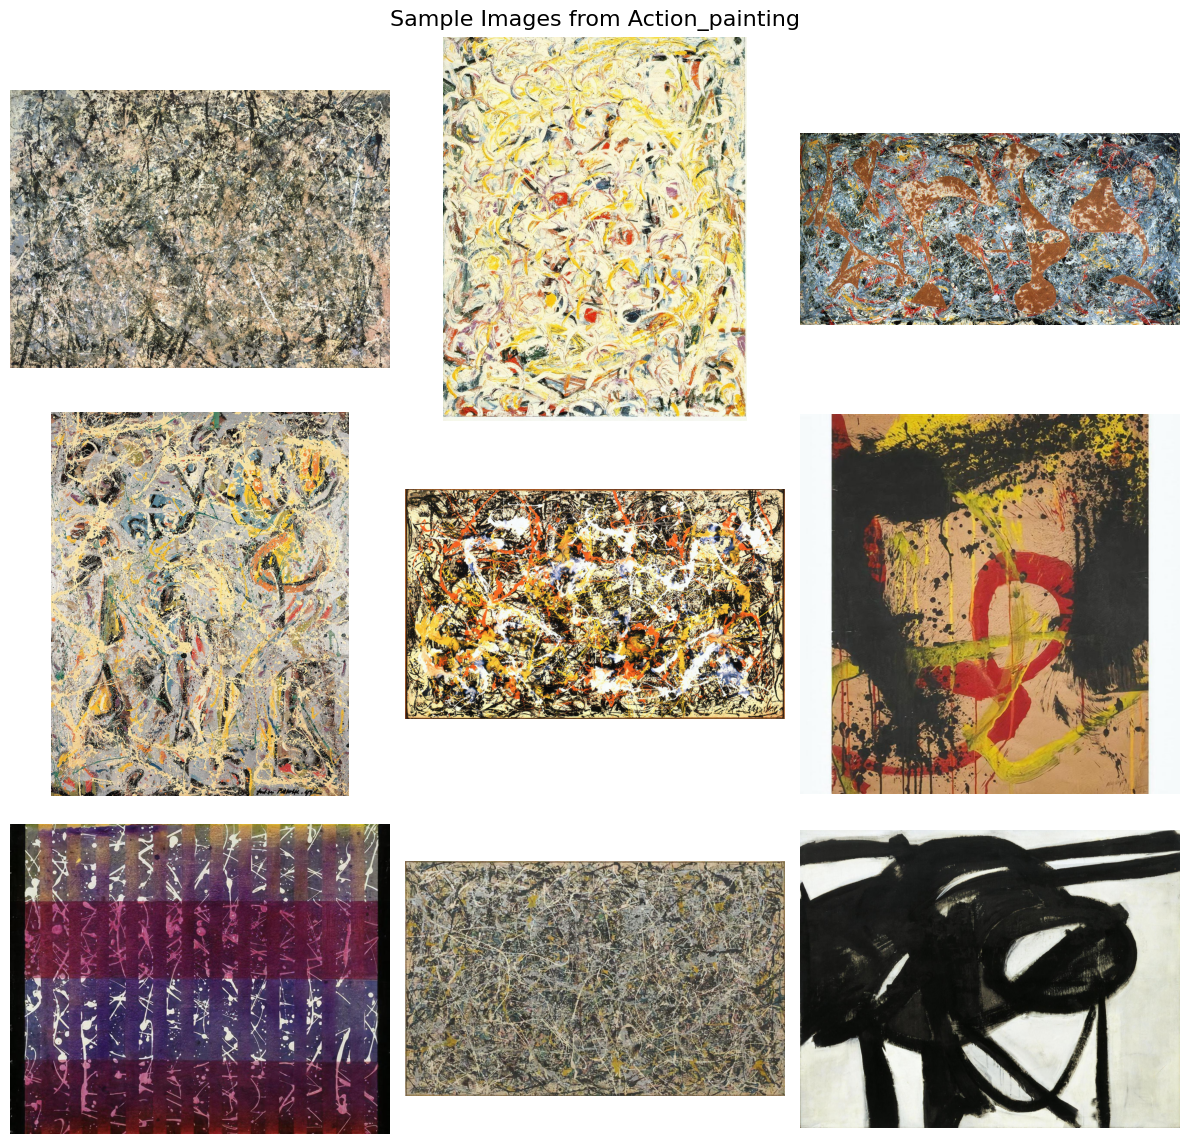

In [15]:
specific_style = 'Action_painting'

style_path = os.path.join(wikiart_dataset, specific_style)
image_files = [f for f in os.listdir(style_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

num_images = 9

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle(f'Sample Images from {specific_style}', fontsize=16)

for i in range(num_images):
    row = i // 3
    col = i % 3

    if i < len(image_files):
        img_path = os.path.join(style_path, image_files[i])
        img = Image.open(img_path)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
    else:
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()
